# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

##  Loading Adult data

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# !curl grab the data from the url and show the output
adult_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data | head
adult_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     039, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 

In [3]:
# !wget grab the data, download it and save it to the file
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
# Show the file in the current working directory
!ls
!ls sample.data

--2019-07-14 19:10:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  15.5MB/s    in 0.2s    

2019-07-14 19:10:37 (15.5 MB/s) - ‘adult.data’ saved [3974305/3974305]

adult.data  sample_data
ls: cannot access 'sample.data': No such file or directory


# Verify data

In [4]:
adult_data= pd.read_csv(adult_data_url)
print(adult_data.shape)
print(adult_data.count())
adult_data.head()

(32560, 15)
39                32560
 State-gov        32560
 77516            32560
 Bachelors        32560
 13               32560
 Never-married    32560
 Adm-clerical     32560
 Not-in-family    32560
 White            32560
 Male             32560
 2174             32560
 0                32560
 40               32560
 United-States    32560
 <=50K            32560
dtype: int64


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# for word count
!curl  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k  100 3881k    0     0   9.8M      0 --:--:-- --:--:-- --:--:--  9.8M
  32562  488415 3974305


In [6]:
adult_data= pd.read_csv(adult_data_url , header = None)
print(adult_data.shape)
adult_data.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
  
  

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [57]:
adult_header= ['age', 'workclass','fnlwgt', 'education','eductaion_num', 'marital-status','occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss','hours-per-week', 'native-country','income_per_year']
#adult_data= pd.read_csv(adult_data_url , header = None, names= adult_header , index_col=0)
adult_data= pd.read_csv(adult_data_url , header = None, names= adult_header)
adult_data.head()
#help(pd.read_csv)

,age,workclass,fnlwgt,education,eductaion_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_per_year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Find Missing Values in Data

In [9]:
# Count number of elemrnt in each column
print(adult_data.count())
# a/c to data expected instances should be 48842


age                32561
workclass          32561
fnlwgt             32561
education          32561
eductaion-num      32561
marital-status     32561
occupation         32561
relationship       32561
race               32561
sex                32561
capital-gain       32561
capital-loss       32561
hous-per-week      32561
native-country     32561
income_per_year    32561
dtype: int64


## Finding Missing values

In [10]:
#count nan value
adult_data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
eductaion-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hous-per-week      0
native-country     0
income_per_year    0
dtype: int64

In [11]:
#show no of unique values in age column
adult_data.age.value_counts()


36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [12]:
adult_data['native-country'].value_counts()
# This column has ? mark

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
adult_data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [0]:
# find missing values
#Replace ? with nan value
adult_data= pd.read_csv(adult_data_url , header = None, names= adult_header, na_values = ' ?')

In [15]:
print(adult_data.shape)
adult_data.isna().sum()

(32561, 15)


age                   0
workclass          1836
fnlwgt                0
education             0
eductaion-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hous-per-week         0
native-country      583
income_per_year       0
dtype: int64

## Drop Missing Values in Data

In [16]:
#adult_data.dropna()
#adult_data.dropna(inplace=True)
adult_data.isna().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
eductaion-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hous-per-week         0
native-country      583
income_per_year       0
dtype: int64

In [17]:
adult_data.dropna(subset = ['native-country'] , inplace = True)
adult_data.isna().sum()

age                   0
workclass          1809
fnlwgt                0
education             0
eductaion-num         0
marital-status        0
occupation         1816
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hous-per-week         0
native-country        0
income_per_year       0
dtype: int64

In [18]:
print(adult_data.shape)

(31978, 15)


##Fill Missing values

In [19]:
adult_data['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [0]:
#adult_data =adult_data.fillna()

## Loading from a local CSV to Google Colab

In [21]:
from google.colab import files
uploaded = files.upload()

In [0]:
#df =pd.read_csv('uploaded file', skiprows= 3)

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

Text(0.5, 1.0, 'Scatter plot')

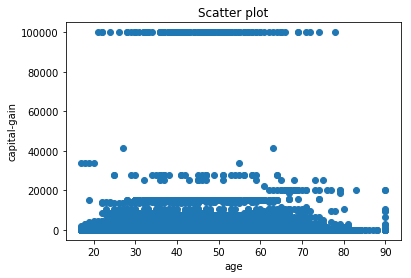

In [66]:
#scatter plot
import matplotlib.pyplot as plt
plt.scatter(adult_data.age , adult_data['capital-gain'])
plt.xlabel('age')
plt.ylabel('capital-gain')
plt.title('Scatter plot')

In [0]:
# Histogram plot

In [31]:
# Seaborn Density Plot
adult_data.age.plot.density

<bound method SeriesPlotMethods.kde of <pandas.plotting._core.SeriesPlotMethods object at 0x7fc5611f67b8>>

In [0]:
# Seaborn Pairplot

## Create the same basic Visualizations using Pandas

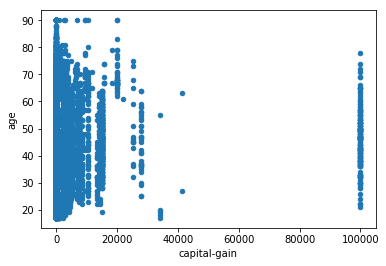

In [33]:
# Pandas Scatter Plot
adult_data.plot.scatter('capital-gain', 'age');


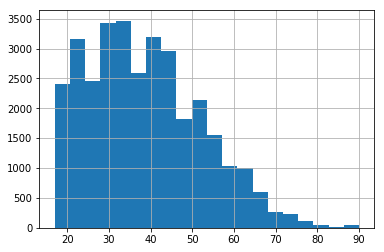

In [62]:
#  Pandas Histogram
#adult_data.hours-per-week.hist();
#adult_data['hours-per-week'].hist()
adult_data.age.hist(bins= 20)
#adult_data['age'].hist()
#adult_data.hist('hours-per-week')


In [0]:
## Pandas Scatter Matrix - Usually doesn't look too great.

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

## Fill Missing Values

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.